In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../Datasets/Bank.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


# Data Preparation

## Checking datatypes of all columns

In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

## Checking for null values

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Exploratory Data Analysis

## What is the distribution of key features

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [7]:
df.age.value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [8]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [9]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [10]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [11]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [12]:
df.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [13]:
df.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [14]:
df.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [15]:
df.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

## Which customer profiles (job, education, etc.) have higher subscription rates

In [16]:
a=df.groupby('job')['y'].value_counts(normalize=True).unstack()
a

y,0,1
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


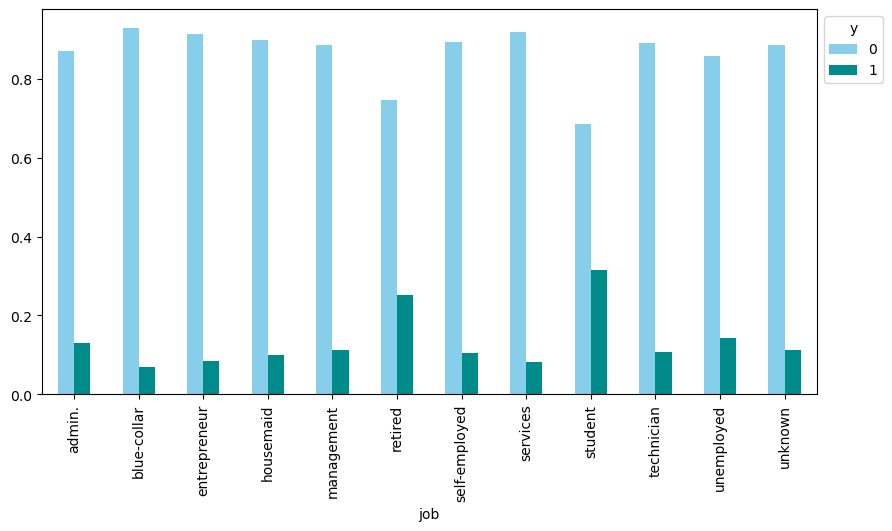

In [17]:
a.plot(kind='bar',figsize=(10,5),color=['skyblue','darkcyan'])
plt.legend(title='y',bbox_to_anchor=(1.0,1.0))
plt.show()

## Subscription with respect to job
#### -Maximun subscription is taken by Students and then Retired group. 
#### -While Minimum subscription is taken by various job profile which include Blue-collar, Services, Entrepreneur and few more.

In [18]:
b=df.groupby('education')['y'].value_counts(normalize=True).unstack()
b

y,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003


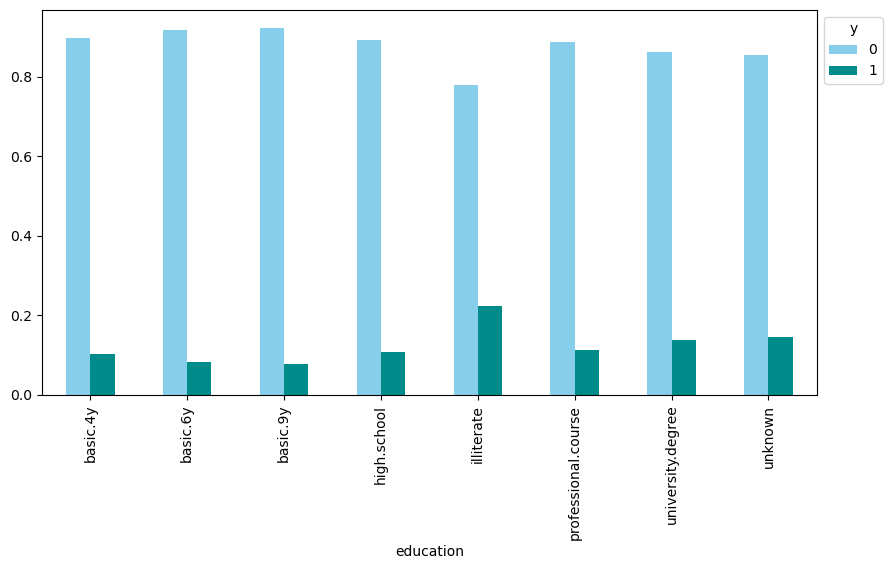

In [19]:
b.plot(kind='bar',figsize=(10,5),color=['skyblue','darkcyan'])
plt.legend(title='y',bbox_to_anchor=(1.0,1.0))
plt.show()


## Subscription rate with respect to education
#### -Illiterate contribute maximum to the subscription.
#### -While others such as basic.6y, basic.9y, basic.4y has very less contribution.

## What are the relationships between input features and the target variable

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [21]:
aa=df[['age','pdays','emp_var_rate','euribor3m','cons_price_idx','campaign','nr_employed','cons_conf_idx','duration','y']].corr()


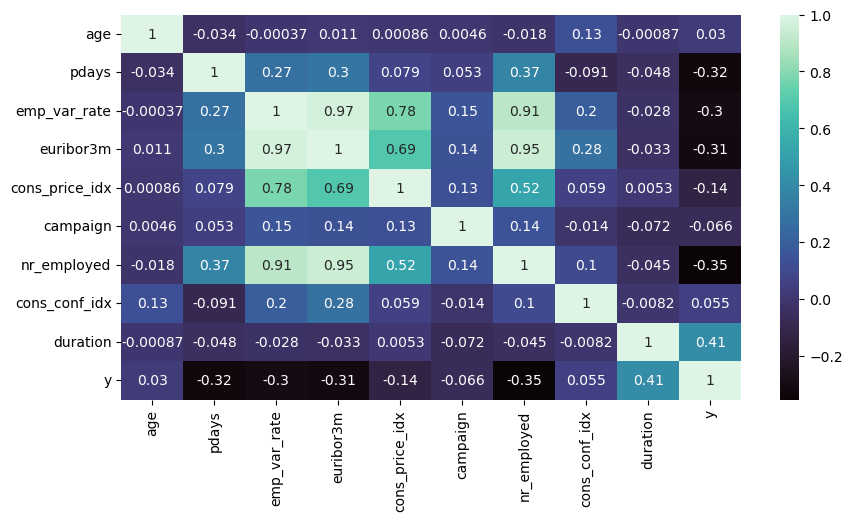

In [51]:
plt.figure(figsize=(10,5))
sb.heatmap(aa,annot=True,cmap='mako')
plt.show()

## Relation between input features and target variable
#### -By reading the heat map we can see that y i.e the subscription rate has no correlation with any other factors.

# Client Profile Analysis
## How do job, marital status, and education affect subscription decisions

In [23]:
j=df.groupby('job')['y'].value_counts(normalize=True).unstack()*100
j

y,0,1
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


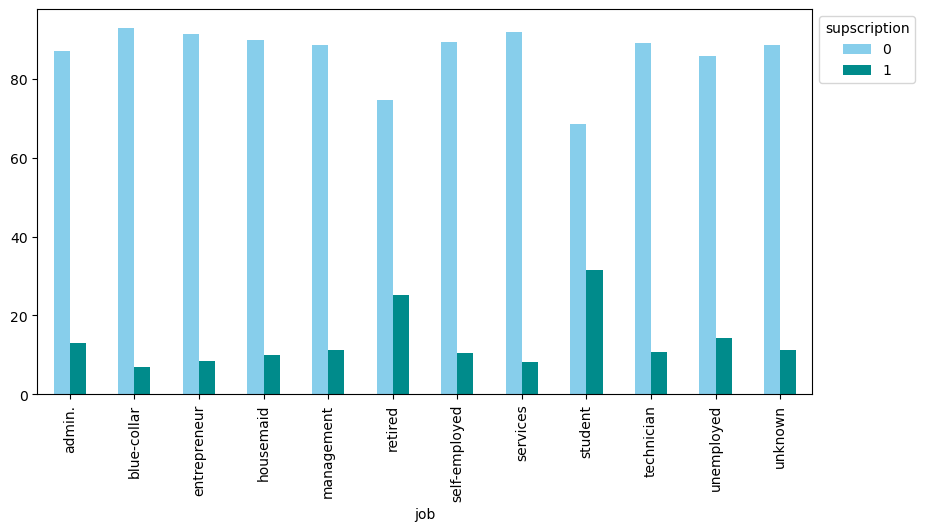

In [24]:
j.plot(kind='bar',figsize=(10,5),color=['skyblue','darkcyan'])
plt.legend(title='supscription',bbox_to_anchor=(1.0,1.0))
plt.show()

In [25]:
m=df.groupby('marital')['y'].value_counts(normalize=True).unstack()*100
m

y,0,1
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


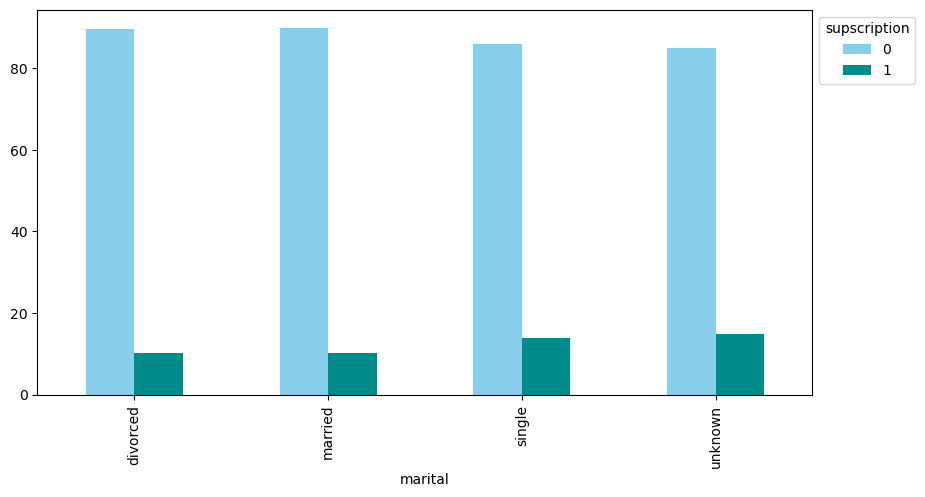

In [26]:
m.plot(kind='bar',figsize=(10,5),color=['skyblue','darkcyan'])
plt.legend(title='supscription',bbox_to_anchor=(1.0,1.0))
plt.show()

## Affect of marraige on subscription decision
#### -Married and Divorced has almost same rate of subscription but Single and Unknown has comparetively more subscription rate.

In [27]:
e=df.groupby('education')['y'].value_counts(normalize=True).unstack()*100
e

y,0,1
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


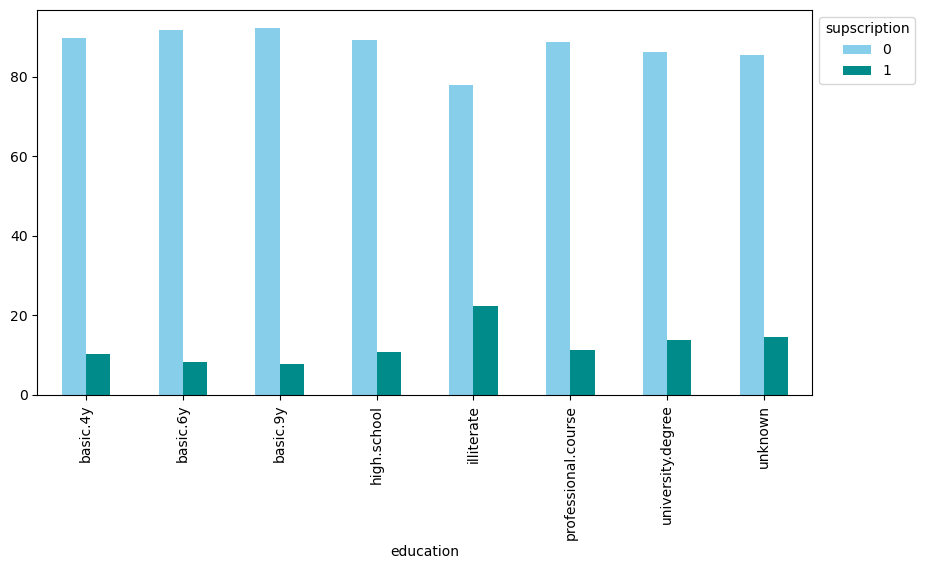

In [28]:
e.plot(kind='bar',figsize=(10,5),color=['skyblue','darkcyan'])
plt.legend(title='supscription',bbox_to_anchor=(1.0,1.0))
plt.show()

# Campaign Effectiveness


## Does the duration of the call increase the chances of a successful subscription

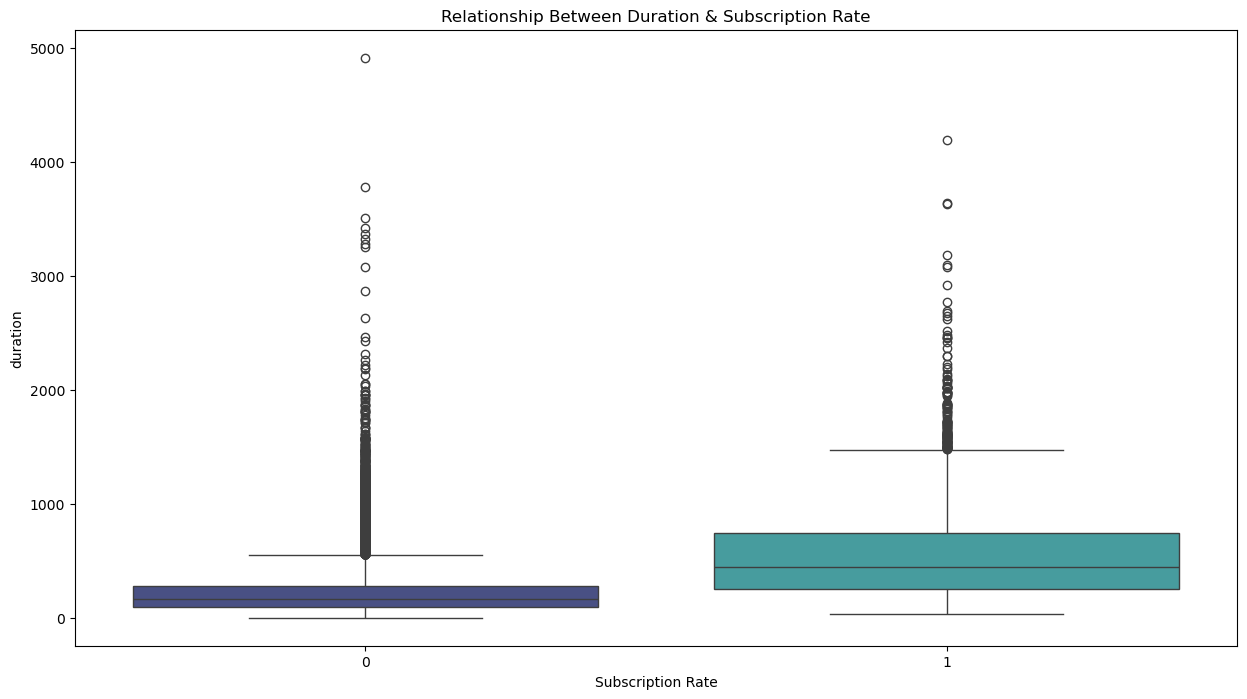

In [29]:
plt.figure(figsize=[15,8])
sb.boxplot(x=df.y, y=df.duration,palette='mako')
plt.title("Relationship Between Duration & Subscription Rate")
plt.xlabel("Subscription Rate")
plt.show()

## Effect of call duration on subscription
#### -As the duration of calls increases subscription rate also increases.
#### -Less call duration did not created great impact on subscription rate.

In [30]:
dy = df.groupby('y')['duration'].mean()
dy

y
0    220.844807
1    553.191164
Name: duration, dtype: float64

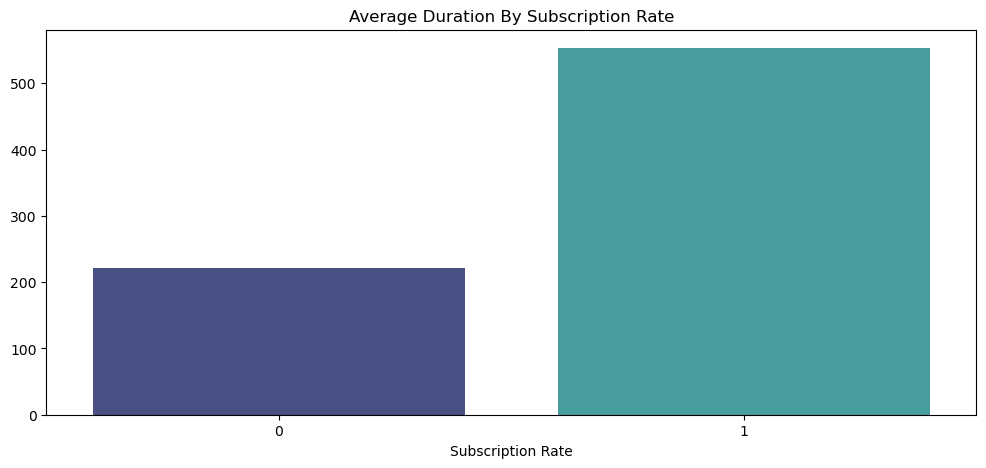

In [50]:
plt.figure(figsize=[12,5])
sb.barplot(x=dy.index, y=dy.values,palette='mako')
plt.title("Average Duration By Subscription Rate")
plt.xlabel("Subscription Rate")
plt.show()

## Which contact methods are most effective

In [32]:
cm = df.groupby('contact')['y'].value_counts(normalize=True).unstack() * 100
cm

y,0,1
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


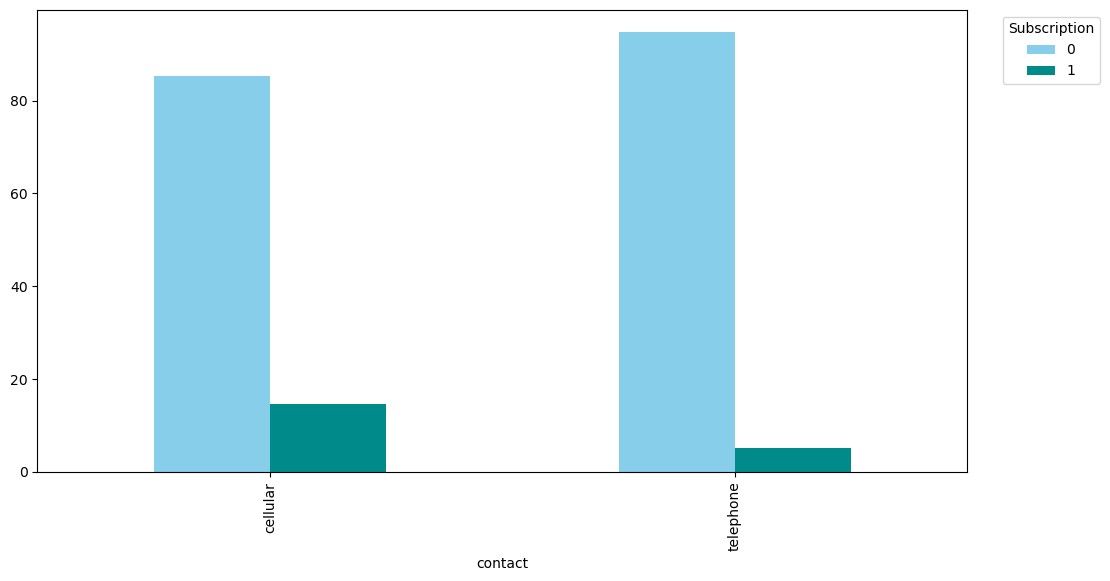

In [33]:
cm.plot(kind='bar', figsize=[12,6],color=['skyblue','darkcyan'])
plt.legend(title='Subscription', bbox_to_anchor=(1.15,1.0))
plt.show()

## Effective contact method
#### -The contacts which were made via Cellular phones very successfull ones, as it has higher subscription rate.
#### -Whlile the ones made with telephone had comparatively less subscription rate. 

## How many contacts are usually needed before a client subscribes

In [34]:
cs=df.groupby('y')['campaign'].mean()
cs

y
0    2.633085
1    2.051724
Name: campaign, dtype: float64

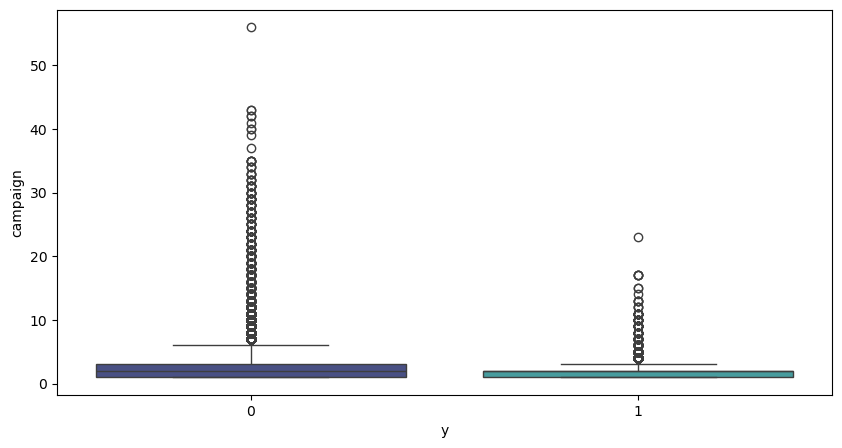

In [35]:
plt.figure(figsize=(10,5))
sb.boxplot(x=df.y,y=df.campaign,palette='mako')
plt.show()

## Contacts made before subscription
#### -The contact was made nearly 5-20 times for the for the ones who subscribed.

# Previous Campaign Impact

## How does the outcome of previous campaigns influence the current one

In [36]:
pc=df.groupby('poutcome')['y'].value_counts(normalize=True).unstack()*100
pc

y,0,1
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


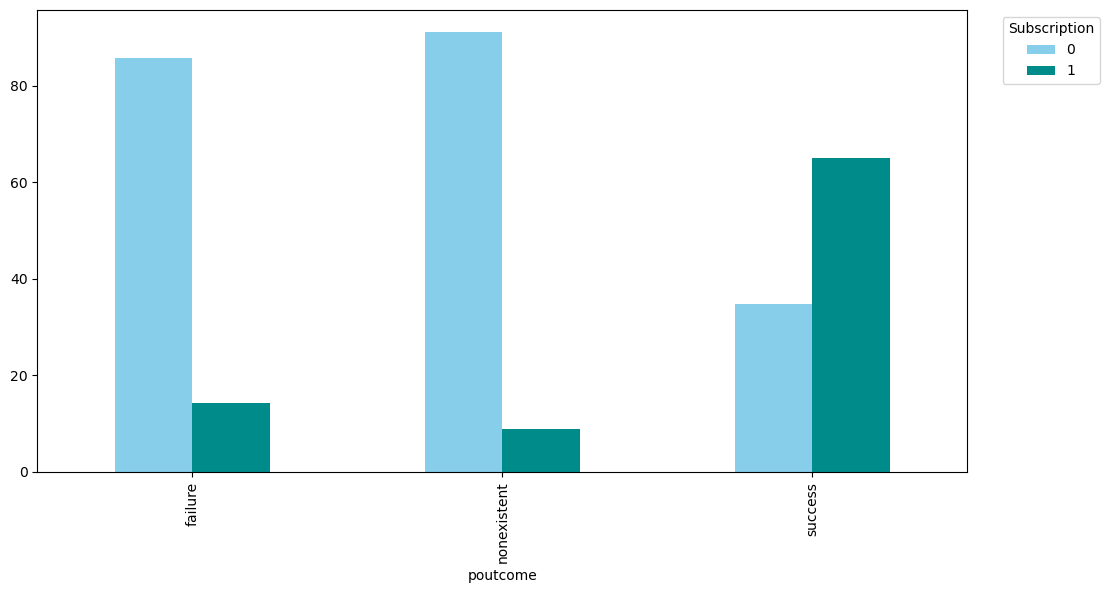

In [37]:
pc.plot(kind='bar', figsize=[12,6],color=['skyblue','darkcyan'])
plt.legend(title='Subscription', bbox_to_anchor=(1.15,1.0))
plt.show()

## Effect of prior campaign
#### -Prior campaign played very important role in subscription and it has maximum success rate.

## Does having prior contact with a client increase the chance of success

In [38]:
pcon = df.groupby('previous')['y'].value_counts(normalize=True).unstack() * 100
pcon

y,0,1
previous,,
0,91.167787,8.832213
1,78.798509,21.201491
2,53.580902,46.419098
3,40.740741,59.259259
4,45.714286,54.285714
5,27.777778,72.222222
6,40.000000,60.000000
7,100.000000,NaN


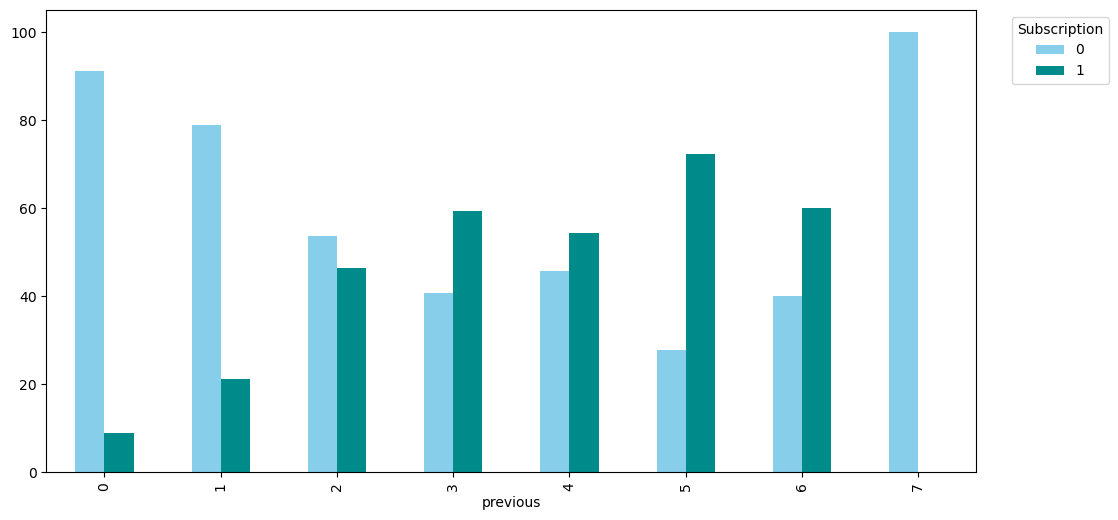

In [39]:
pcon.plot(kind='bar', figsize=[12,6],color=['skyblue','darkcyan'])
plt.legend(title='Subscription', bbox_to_anchor=(1.15,1.0))
plt.show()

## Success rate after having prior contact
#### -Thers is high success rate from the ones with whom prior contact was done more number of time.
#### -But it gradually decreased after 5.

# Temporal Analysis

## Which months have higher subscription rates

In [40]:
months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [41]:
ms = df.groupby('month')['y'].value_counts(normalize=True).unstack() * 100
ms = ms.reindex(months)

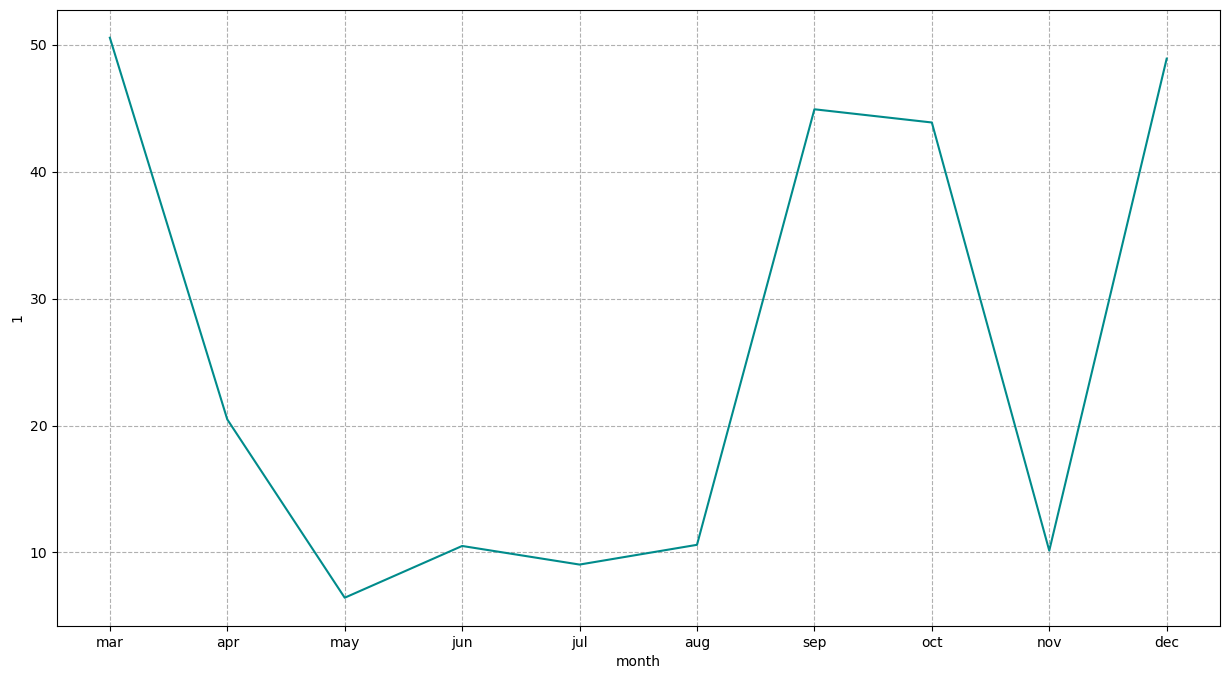

In [42]:
plt.figure(figsize=[15,8])
sb.lineplot(x=ms.index, y=ms[1], color='darkcyan')
plt.grid(linestyle='--')
plt.show()

## Monthly subscription
#### -Subscription was maximun in the months of March, Sept, Oct and December.
#### -And very low in the months of may, june, july and august.

## Is there any effect of the day of the week on subscription success?

In [46]:
days=['mon','tue','wed','thu','fri']

In [47]:
d = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack() * 100
d = d.reindex(days)
d

y,0,1
day_of_week,,
mon,90.051680,9.948320
tue,88.220025,11.779975
wed,88.332924,11.667076
thu,87.881248,12.118752
fri,89.191261,10.808739


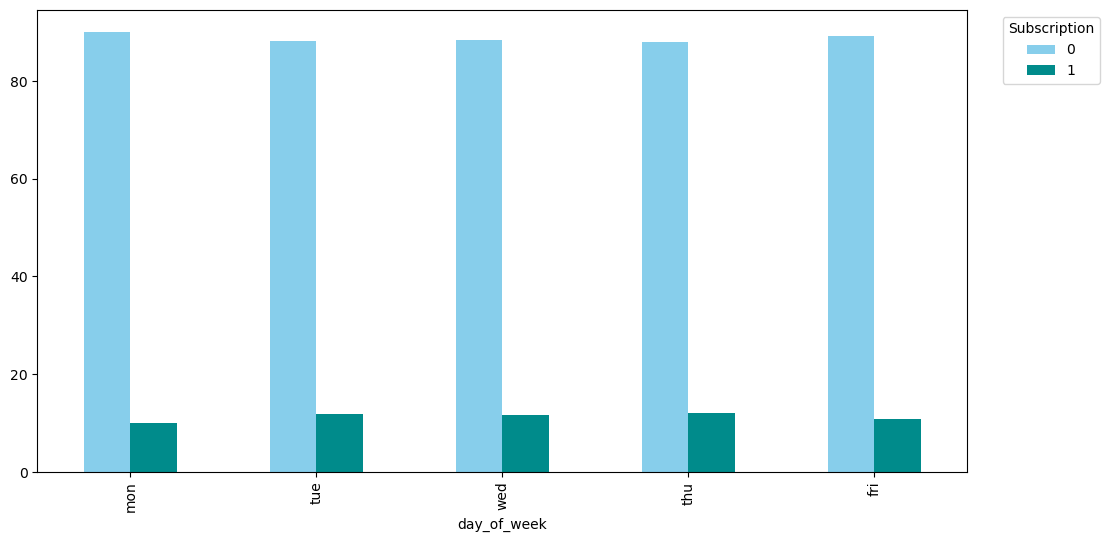

In [48]:
d.plot(kind='bar', figsize=[12,6],color=['skyblue','darkcyan'])
plt.legend(title='Subscription', bbox_to_anchor=(1.15,1.0))
plt.show()

## Effect of day on subscription rate
#### -Almost every day has same subscription rate which is between 0-20.
#### -But the ratio of non sybscribers is much more than that of the subcribers.